In [1]:
library(tidyverse)
library(ggpubr)
library(rstatix)

NameError: name 'library' is not defined

In [2]:
install.packages("dplyr")

NameError: name 'install' is not defined

In [17]:
install.packages("ggpubr")

also installing the dependencies ‘zip’, ‘SparseM’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘tidyselect’, ‘vctrs’, ‘lifecycle’, ‘glue’, ‘rlang’, ‘broom’, ‘car’, ‘ellipsis’, ‘pillar’, ‘ggrepel’, ‘tidyr’, ‘dplyr’, ‘rstatix’, ‘tibble’

Warning message in install.packages("ggpubr"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘SparseM’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘sp’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘minqa’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘statmod’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of pa

In [67]:
res_25_0 = read.csv("results/25_0.csv")
res_25_75 = read.csv("results/25_75.csv")
res_50_0 = read.csv("results/50_0.csv")
res_50_50 = read.csv("results/50_50.csv")
res_75_0 = read.csv("results/75_0.csv")
res_75_25 = read.csv("results/75_25.csv")
res_100_0 = read.csv("results/100_0.csv")

In [68]:
data <- rbind(res_25_0, res_25_75, res_50_0, res_50_50, res_75_0, res_75_25, res_100_0)
data$real_data <- as.factor(data$real_data)
data$synth <- as.factor(data$synth)

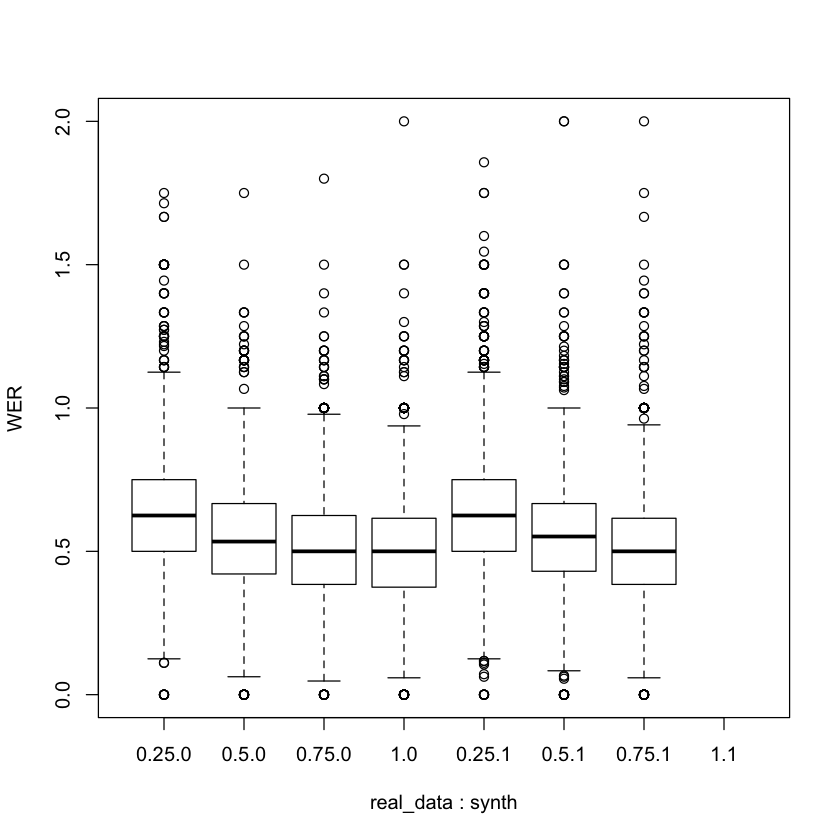

In [69]:
boxplot(WER ~ real_data * synth, data=data)

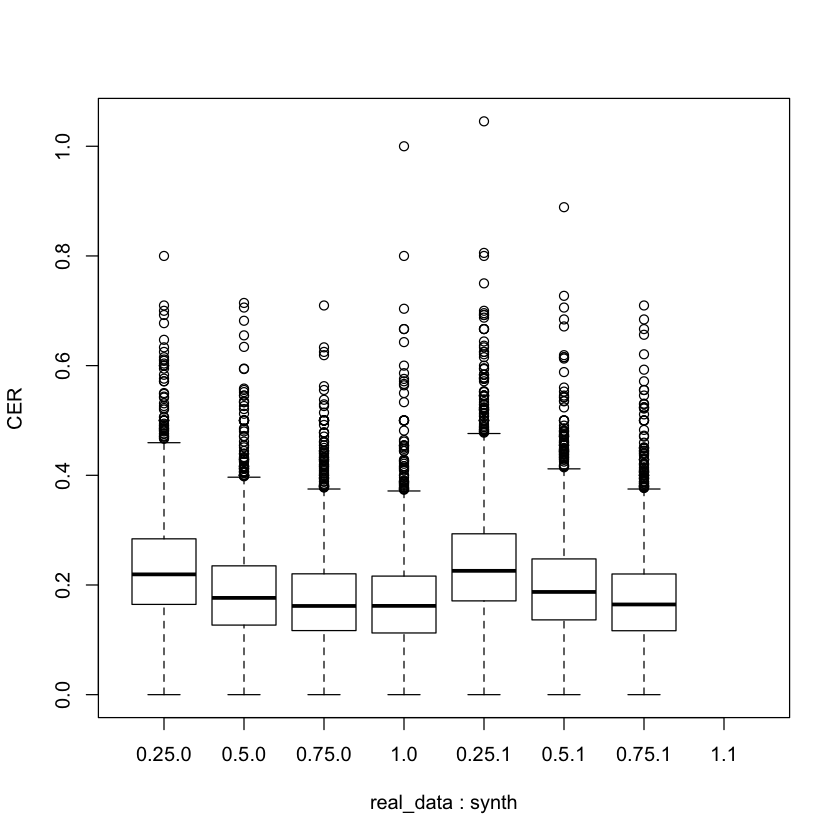

In [21]:
boxplot(CER ~ real_data * synth, data=data)

In [22]:
model <- lm(WER ~ real_data * synth, data=data)

In [24]:
res <- anova(model)

In [25]:
res

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
real_data,3,52.9925884,17.66419615,424.714384,9.009202e-267
synth,1,0.1086761,0.10867613,2.612987,1.060092e-01
real_data:synth,2,0.2921119,0.14605594,3.511740,2.986503e-02
Residuals,18333,762.4834959,0.04159077,NA,NA


In [ ]:
# Check the homogeneity of variance assumption
plot(res, 1)

In [ ]:
# Check the normality assumpttion in residuals
plot(res, 2)

In [ ]:
# Extract the residuals
aov_residuals <- residuals(object = res)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

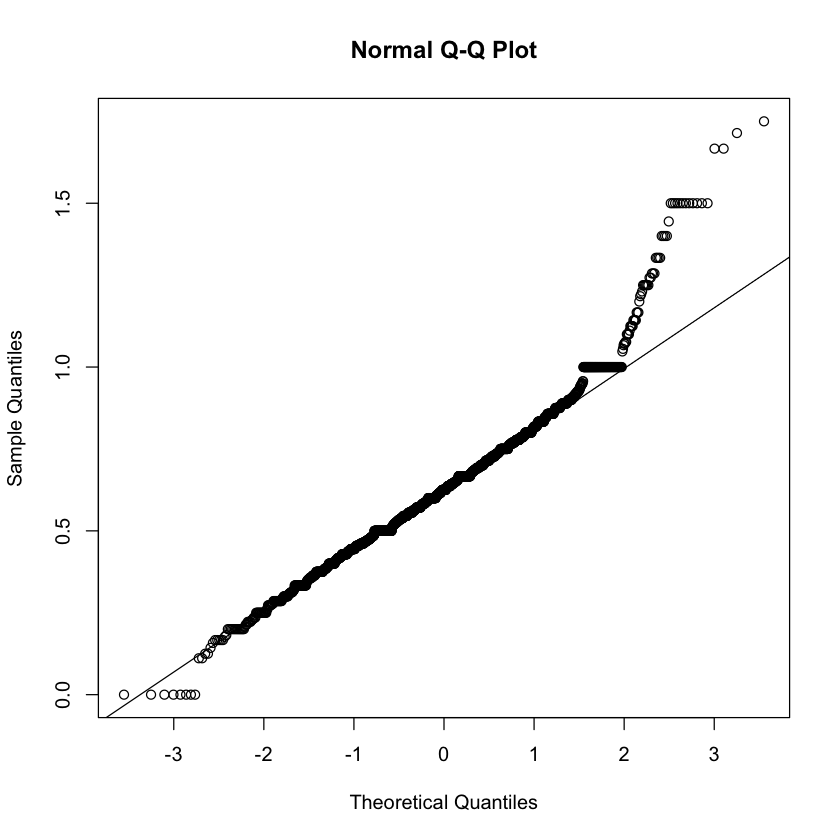

In [10]:
qqnorm(res_25_0$WER)
qqline(res_25_0$WER)

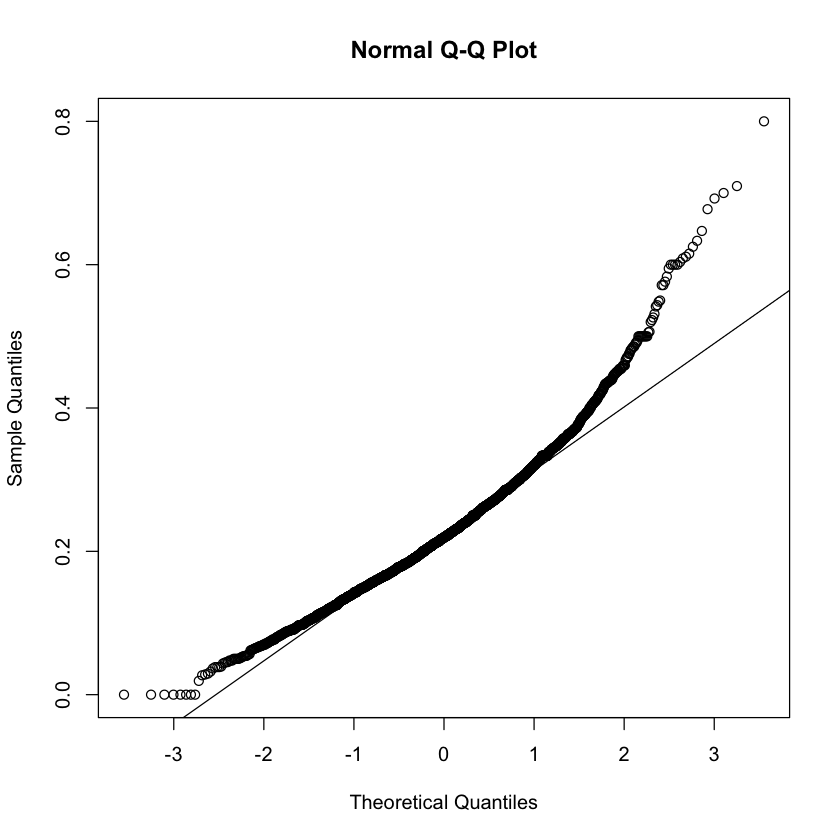

In [11]:
qqnorm(res_25_0$CER)
qqline(res_25_0$CER)

In [36]:
model <- lm(CER ~ real_data, data=data)
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
real_data,3,11.58165,3.860551268,438.6218,3.144595e-275
Residuals,18336,161.38521,0.008801549,NA,NA


In [35]:
model <- lm(CER ~ synth, data=data)
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
synth,1,0.8160331,0.816033064,86.92618,1.251245e-20
Residuals,18338,172.1508287,0.009387656,NA,NA


In [34]:
model <- lm(CER ~ real_data * synth, data=data)
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
real_data,3,11.58165380,3.860551268,439.293371,1.233734e-275
synth,1,0.18866958,0.188669577,21.468772,3.621120e-06
real_data:synth,2,0.08441833,0.042209164,4.802994,8.215468e-03
Residuals,18333,161.11212005,0.008788094,NA,NA


In [65]:
interaction.plot(data$real_data, data$synth)

ERROR: Error in tapply(response, list(x.factor, trace.factor), fun): argument "response" is missing, with no default


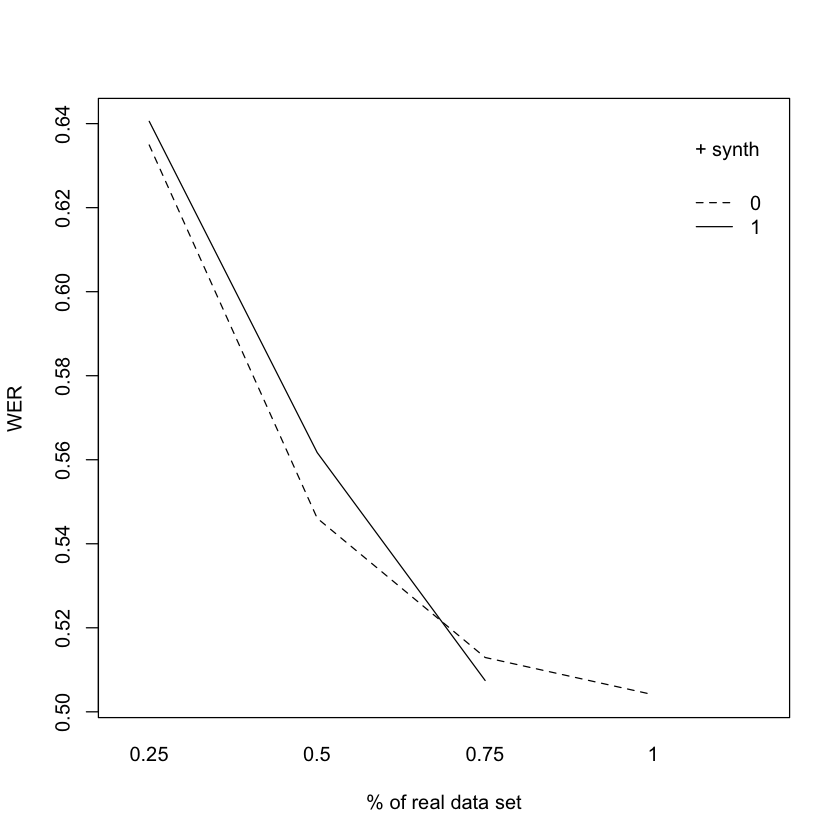

In [88]:
interaction.plot(data$real_data, data$synth, data$WER, ylab="WER", xlab="% of real data set", trace.label="+ synth")

In [38]:
?boxplot

Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“kan ikke åbne komprimeret fil '/Users/ande765a/miniconda3/lib/R/library/pillar/DESCRIPTION', sandsynlig årsag 'No such file or directory'”Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“kan ikke åbne komprimeret fil '/Users/ande765a/miniconda3/lib/R/library/tibble/DESCRIPTION', sandsynlig årsag 'No such file or directory'”Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“kan ikke åbne komprimeret fil '/Users/ande765a/miniconda3/lib/R/library/dplyr/DESCRIPTION', sandsynlig årsag 'No such file or directory'”Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“kan ikke åbne komprimeret fil '/Users/ande765a/miniconda3/lib/R/library/tidyselect/DESCRIPTION', sandsynlig årsag 'No such file or directory'”Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“kan ikke åbne komprimeret

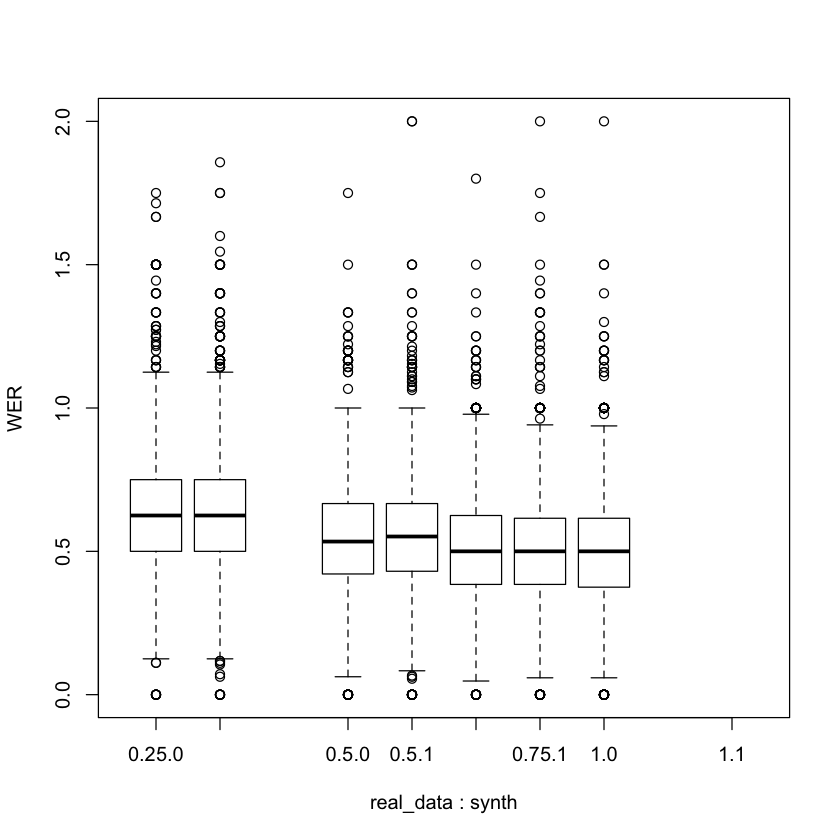

In [55]:
boxplot(WER ~ real_data + synth, data=data, at=c(0, 3, 5, 7, 1, 4, 6, 9))